# OpenEO for ESA CCI Land Cover Data

The Land Cover/HRLC collections can be browsed using the CCI STAC browser at https://radiantearth.github.io/stac-browser/#/external/api.stac.164.30.69.113.nip.io/collections/cci_openeo, where we can see there are 6 individual OpenEO data cubes which correspond to 5 of the land cover datasets provided by CEDA. The datasets, and their OpenEO counterparts are listed below

## CEDA Land Cover Dataset Records
1. ESA Land Cover Climate Change Initiative (Land_Cover_cci): Global Land Cover Maps, Version 2.0.7
2. ESA High Resolution Land Cover Climate Change Initiative (High_Resolution_Land_Cover_cci): High Resolution Land Cover and Land Cover Change Maps in Amazonia (Eastern Amazonas region) at 30m spatial resolution in GeoTiff format, 1990-2019, v1.2
3. ESA High Resolution Land Cover Climate Change Initiative (High_Resolution_Land_Cover_cci): High Resolution Land Cover and Land Cover Change Maps in Siberia (Norther Siberia region) at 30m spatial resolution in GeoTiff format, 1990-2019, v1.2
4. ESA High Resolution Land Cover Climate Change Initiative (High_Resolution_Land_Cover_cci): High Resolution Land Cover Maps in Siberia (Northern Siberia region) at 10m spatial resolution for 2019 in Geotiff format, v1.2
5. ESA High Resolution Land Cover Climate Change Initiative (High_Resolution_Land_Cover_cci): High Resolution Land Cover Maps in Amazonia (Eastern Amazonas region) at 10m spatial resolution for 2019 in Geotiff format, v1.2

## OpenEO Datacubes
1. ESACCI.LC.yr.L4.LCCS.multi-sensor.multi-platform.Map.2-0-7.r1.openeo

2a. ESACCI.LC.5-yrs.L4.Map.multi-sensor.multi-platform.HRLC30-A02.v1-2.Amazonia.openeo

2b. ESACCI.LC.5-yrs.L4.Map.multi-sensor.multi-platform.HRLCC30-A02.v1-2.Amazonia.1990_1995.openeo

3. ESACCI.LC.yr.L4.Map.multi-sensor.multi-platform.HRLC30-A03.v1-2.Siberia.openeo
4. ESACCI.LC.yr.L4.Map.multi-sensor.multi-platform.HRLC10-A03.v1-2.Siberia.openeo
5. ESACCI.LC.5-yrs.L4.Map.multi-sensor.multi-platform.HRLC10-A02.v1-2.Amazonia.openeo

Works are continuing to improve the CCI OpenEO Land Cover collections. DRS 2b is currently experiencing an issue with the allocated 'bands', and DRS 1 is experiencing performance issues due to very large geotiff files that have not been optimised for cloud access.

For more info on local processing with OpenEO visit: https://open-eo.github.io/openeo-python-client/cookbook/localprocessing.html

## OpenEO Local Processing

Make sure you have used one of the requirements files from this repository (either for python3.10 or python3.11) to install all necessary packages for OpenEO local processing.

First we import the local connection processor from OpenEO and configure for local processing. We can also import matplotlib for plotting some example data later.

In [6]:
from openeo.local import LocalConnection
import matplotlib.pyplot as plt

connection = LocalConnection('./')

Then we can configure for the CCI OpenEO endpoint using the following cell. Note that we have selected a specific DRS from the options above, which are also listed in the STAC browser at the URL above.

In [27]:
url = 'https://api.stac.164.30.69.113.nip.io/collections/esacci.lc.5-yrs.l4.map.multi-sensor.multi-platform.hrlc30-a02.v1-2.amazonia.openeo'

spatial_extent = {'north':-16, 'south':-20, 'west':-53, 'east':-50}
temporal_extent = ['2001-01-01','2001-12-31']

datacube = connection.load_stac(url=url, spatial_extent=spatial_extent, temporal_extent=temporal_extent)
dataset = datacube.execute()

For this selection we do not need to specify the `bands` at the point of loading the OpenEO dataset as they are implied from the STAC collection. We perform the spatial/temporal selections at the point of loading the collection, otherwise the `execute` function would load the entire collection later in processing before any selections are made!

In [28]:
dataset

<xarray.DataArray (bands: 5, time: 1, y: 14784, x: 10700)> Size: 3GB
dask.array<getitem, shape=(5, 1, 14784, 10700), dtype=float32, chunksize=(1, 1, 14784, 10700), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 118kB 8.231e+06 8.231e+06 ... 7.787e+06 7.787e+06
  * x            (x) float64 86kB 2.86e+05 2.86e+05 ... 6.069e+05 6.07e+05
    spatial_ref  int32 4B 32722
  * time         (time) datetime64[ns] 8B 2000-01-01
  * bands        (bands) object 40B 'MAP_CL01' 'UNCERT_CL02' ... 'UNCERT_PS02'

We can now perform slicing operations on this lazily loaded dataset, which are stored in a Dask Processing Graph supplied by OpenEO. Here we 'squeeze' the dimensions we don't need i.e 1D time and band, so we are left with a 2 dimensional array to plot.

In [29]:
lc = dataset.sel(bands='MAP_CL01').squeeze()
lc

<xarray.DataArray (y: 14784, x: 10700)> Size: 633MB
dask.array<getitem, shape=(14784, 10700), dtype=float32, chunksize=(14784, 10700), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 118kB 8.231e+06 8.231e+06 ... 7.787e+06 7.787e+06
  * x            (x) float64 86kB 2.86e+05 2.86e+05 ... 6.069e+05 6.07e+05
    spatial_ref  int32 4B 32722
    time         datetime64[ns] 8B 2000-01-01
    bands        <U8 32B 'MAP_CL01'

We can now plot this geotiff as normal with the xarray `plot` function. Note that this is not currently representing a dataset of any particular relevance. Further specifying the spatial/temporal dimensions would be necessary.

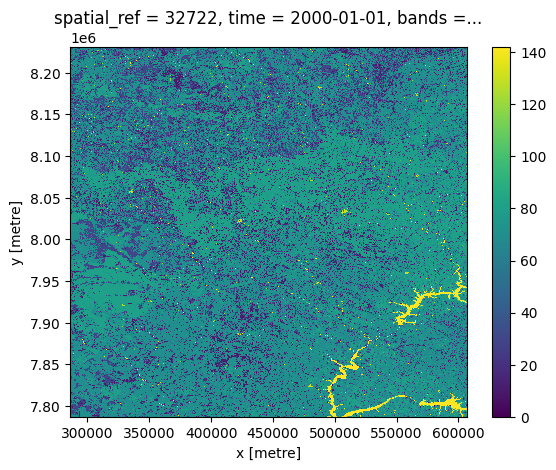

In [25]:
lc.plot()

Note that OpenEO has added metadata/axes to this plot based on the information in the data cube. The plot labels and title can be adjusted using typical matplotlib syntax. See the [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html) for a full description of how to customise the plot.